# Tutorial: Running community dynamics simulations

This tutorial will teach you how to simulate microbial communities using my community_dynamics_and_properties package. You will be simulating microbial community dynamics using the generalised Lotka-Volterra model (gLV).

This tutorial gives a brief introduction to the gLV, then explains how to create model parameters with the **community_parameters** class and run the model using the **gLV** class, then explains how to create and simulate communities easily using the **community** class. I explain how the community_parameters and gLV classes work to give you some intuition on how the community class works. However, please only use the community class in your simulations.
> ***IN YOUR OWN SIMULATIONS, PLEASE ONLY USE THE COMMUNITY CLASS. DO NOT USE THE COMMUNITY_PARAMETERS AND GLV CLASSES. IT WILL BE MUCH EASIER.***

The code from this tutorial is available as a .py script for running your own simulations: Tutorial for Running Community Dynamics Simulations.py

## Introduction to the generalised Lotka-Volterra model.

The generalised Lotka-Volterra model describes the change in biomass ($N$) of species $i$ over time ($\frac{dN_i}{dt}$) as

$$\frac{dN_i}{dt} = g_iN_i\left(1 - \sum_{i=1}^S\alpha_{i,j}N_j\right) + D.$$

$N_i$ = the biomass or population size of species $i$. <br>
$g_i$ = the growth rate of species $i$. <br>
$\alpha_{i,j}$ = the effect of species $j$ on the growth of species $i$. <br>
- When $i = j$, $\alpha_{i,i}$ describes self/within-species interactions.  This is known as an intraspecific interaction. This is equivalent to the carrying capacity of species $i$ in the absence of other microbes. $\alpha_{i,i}$ is typically set to 1 $(\alpha_{i,i} = 1)$ to prevent divergence.
- When $i \neq j$, $\alpha_{i,j}$ describes the interaction with other species of microbes, This is known as an interspecific interaction. When $\alpha_{i,j} > 0$, species $j$ has a negative effect on species $i$'s growth, so the interaction is competitive. When $\alpha_{i,j} < 0$, species $j$ has a positive effect on species $i$'s growth, so the interaction is cooperative. 

$D$ = the dispersal rate. It is a constant.

The gLV can also be written in the matrix form

$$\frac{dn_i}{dt} = n_if_i(\mathbf{n}) + D,$$

where vector $\mathbf{f}$ is given by

$$\mathbf{f} = \mathbf{g} - \mathbf{A}\mathbf{n}.$$

$\mathbf{g}$ is a vector of growth rates, $\mathbf{n}$ is a vector of species' biomasses, and $\mathbf{A}$ is the **interaction matrix**, which is made up of $\alpha_{i,j}$ interaction terms.

## Running gLVs using **community_dynamics_and_properties** package.

This section will explain how you can run community dynamics simulations using the **community_dynamics_and_properties** package.
Communities are usually created and simulated using the **community class**. This can be broken down into two other classes:
- The **community_parameters class**, which creates model parameters.
- The **gLV class**, which generates initial species abundances and runs the simulation.

The ** community class** combines the **community_parameters** and **gLV** classes together.

I will first explain how to use the community_parameters and gLV classes to run a single simulation, then how they come together to make the community class. This will hopefully give you a better understanding of how the package works.

### Import Packages

Firstly, we need to import our required packages.

In [74]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from copy import deepcopy
import importlib

from community_dynamics_and_properties import *

In [96]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Running a single simulation using the community_parameters and gLV class.

#### Creating model parameters with the **community_parameters** class.

The gLV has several parameters: number of species ($S$), species growth rates ($g$), and the interaction matrix.
We first create an object of the community_parameters class to hold or create all these parameters.

A community_parameters object always has these four *attributes* (variables bound in a class):
- ***no_species***, the initial number of species in the community ($S$).
- ***growth_rates***, species growth rates ($\mathbf{g}$).
- ***interaction_matrix***, the interaction matrix ($\mathbf{A}$).
- ***dispersal***, the dispersal rate ($D$).

**no_species** and **dispersal** are supplied by the user.
> When creating the community_parameters object, set no_species = $<$your number of species$>$ and dispersal = $<$your dispersal rate$>$.

There are are several ways to generate **growth_rates** and the **interaction_matrix**. Either you can supply your own array of growth rates or interaction matrix, or you can call some of the *class methods* to generate them for you:
- **growth_rates**
    - The 'fixed' method: All species growth rates are set to 1.
      > When creating the community_parameters object, set *growth_func_name='fixed'*, *growth_args=None*, and *usersupplied_growth=None*.
    - The 'normal' method: Growth rates are drawn from a normal distribution $\mathcal{N}(\mu_g,\sigma_g)$.
      > When creating the community_parameters object, set *growth_func_name='normal'*, *growth_args={'mu_g':$<$your mean growth rate$>$,'sigma_a':$<$your standard deviation$>$}*, and *usersupplied_growth=None*.
    - To supply your own growth rates, you can set usersupplied_growth to your own array.
      > When creating the community_parameters object, set *growth_func_name=None*, *growth_args=None*, and *usersupplied_growth=$<$your array of growth rates$>$*.
- **interaction_matrix**
    - The 'random' method: A random interaction matrix, drawn from $\mathcal{N}(\mu_{\alpha},\sigma_{\alpha})$, is created.
      > When creating the community_parameters object, set *interact_func_name='random'*, *interact_args={'mu_a':$<$your mean interaction strength$>$,'sigma_a':$<$your standard deviation$>$}*, and *usersupplied_interactmat=None*.
    - To supply your own interaction matrix, you can set usersupplied_interactmat to your own matrix.
      > When creating the community_parameters object, set *interact_func_name=None*, *interact_args=None*, and *usersupplied_interact=$<$your interaction matrix$>$*.

##### Examples

1. Create a community with 3 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.

In [77]:
community_parameters_object = community_parameters(no_species=3, growth_func_name='fixed', growth_args=None,
                                                   interact_func_name='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                                                   usersupplied_growth=None, usersupplied_interactmat=None,
                                                   dispersal=1e-8)

You could also create a community_parameters object like this:

In [78]:
no_species = 3
interaction_distribution = {'mu_a':0.9,'sigma_a':0.15}
dispersal=1e-8

community_parameters_object = community_parameters(no_species, 'fixed', None, 'random', interaction_distribution,
                                                   None, None, 1e-8)

2. Create a community with 3 species, growth rates drawn from $\mathcal{N}(1,0.3)$, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.

In [79]:
community_parameters_object = community_parameters(no_species=3, growth_func_name='normal', growth_args={'mu_g':1,'sigma_g':3},
                                                   interact_func_name='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                                                   usersupplied_growth=None, usersupplied_interactmat=None,
                                                   dispersal=1e-8)

3. Create a community with 3 species, growth rates and the interaction matrix are supplied by the user, and dispersal set to $10^{-8}$.

In [80]:
user_growth_rates = np.array([1.1,0.7,1.5]) # growth rates = 1.1, 0.7 and 1.5
user_interaction_matrix = np.array([[1,0.2,1.4],[0,1,0.6],[1.1,0.9,1]])

community_parameters_object = community_parameters(no_species=3, growth_func_name=None, growth_args=None, interact_func_name=None, interact_args=None,
                                                   usersupplied_growth=user_growth_rates, usersupplied_interactmat=user_interaction_matrix,
                                                   dispersal=1e-8)

You can then inspect the attributes of your community_parameters object, aka your model parameters, using community_parameters_object.$<$attribute$>$:

In [68]:
print('Initial number of species =', community_parameters_object.no_species, end='\n')
print('Growth rates =', community_parameters_object.growth_rates, end='\n')
print('Interaction matrix =', community_parameters_object.interaction_matrix, end='\n')
print('Dispersal =', community_parameters_object.dispersal, end='\n')

Initial number of species = 3
Growth rates = [1.1 0.7 1.5]
Interaction matrix = [[1.  0.2 1.4]
 [0.  1.  0.6]
 [1.1 0.9 1. ]]
Dispersal = 1e-08


#### Simulations with the **gLV** class.

To run simulations, you need to create a **gLV** class. The **gLV** class works by taking a **community_parameters** object as an input to get model parameters, then runs an ODE solver from some initial species abundances.

The important gLV class attributes for simulating community dynamics are:
- ***t_end***, the time to run simulations.
- ***initial_abundances***, initial species abundances, supplied to the ODE solver.
- ***ODE_sol***, the simulation. (A *scipy.integrate.solve_ivp* object using the Runge-Kutta method for numerically solving ODEs.)

There are several ways to generate initial species abundances:
- The 'Mallmin' method: From Mallmin et al. (2024), generate initial species abundances from a uniform distribution $\mathcal{U}(D,S/2)$.
  > When creating the gLV object, set *init_cond_func_name = 'Mallmin'*.
- The 'Hu' method: From Hu et al. (2022), generate initial species abundances from a uniform distribution $\mathcal{U}(0,2\mu_{\alpha})$.
   > When creating the gLV object, set *init_cond_func_name = 'Hu'*.
- To supply your own inital species abundances, set usersupplied_init_cond to your array of initial abundances.
   > When creating the gLV object, set *usersupplied_init_cond = $<$your initial species abundances$>$*.

##### Examples

(These example will use a community with 50 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$.)

1. Run a gLV model for t = 5000, generating initial conditions using the 'Mallmin' method.

In [81]:
community_parameters_object = community_parameters(no_species=50, growth_func_name='fixed', growth_args=None,
                                                   interact_func_name='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                                                   usersupplied_growth=None, usersupplied_interactmat=None,
                                                   dispersal=1e-8)

gLV_object = gLV(community_parameters_object, t_end=5000, init_cond_func_name='Mallmin')

1. Run a gLV model for t = 5000, supplying your own initial species abundances.

In [91]:
community_parameters_object = community_parameters(no_species=50, growth_func_name='fixed', growth_args=None,
                                                   interact_func_name='random', interact_args={'mu_a':0.9,'sigma_a':0.15},
                                                   usersupplied_growth=None, usersupplied_interactmat=None,
                                                   dispersal=1e-8)

initial_species_abundances = np.repeat(0.5,50) # all species start with abundances of 0.5

gLV_object = gLV(community_parameters_object, t_end=5000, usersupplied_init_cond=initial_species_abundances)

You can plot your simulation using the ODE_sol attribute.

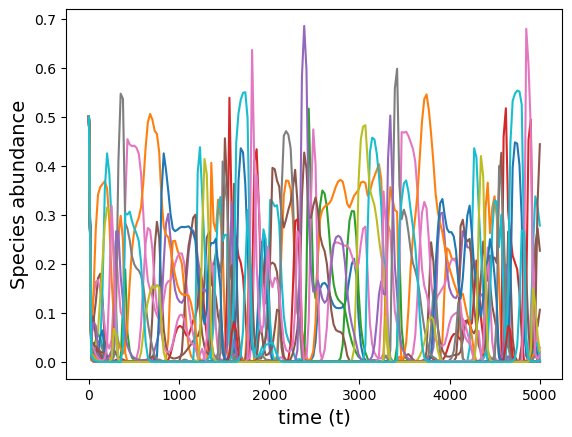

In [92]:
plt.plot(gLV_object.ODE_sol.t,gLV_object.ODE_sol.y.T)
plt.xlabel('time (t)',fontsize=14)
plt.ylabel('Species abundance',fontsize=14)
plt.show()

You can also inspect other class attributes like the community_parameters class.

In [84]:
print('Initial species abundances = ', gLV_object.initial_abundances, end= '\n')

Initial species abundances =  [0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5]


#### Analysising community properties with the **gLV** class.

As well as simulate microbial communities, the gLV class can analyse community properties, such as species diversity, community stability, etc.

The community properties/attributes the gLV can calculate are:
- ***final_diversity***, the species diversity at the end of simulations. Technically, species diversity is calculated in the final 20% of the simulation (e.g. if the simulation ran until t = 10000, species diversity is calculated from t = 8000-10000).
- ***final_composition***, the species present at the end of simulation. Also calculated from the final 20% of the simulation.
- ***invasibility***, the proportion of species that are able to reinvade the community from very low abundances. **This is used to distinguish between high diversity "fluctuating" communities (our communities of interest) and low diversity stable communities or limit-cycles.**

To calculate community properties, create a gLV object, the call the identify_community_properties method.

In [93]:
gLV_object.identify_community_properties()

print('Species diversity at the end of simulation = ', gLV_object.final_diversity, end='\n')
print('Species composition at the end of simulation = ', np.trim_zeros(gLV_object.final_composition,'b').astype(int), end='\n')
print('Invasibility = ', gLV_object.invasibility, end='\n')

Species diversity at the end of simulation =  36
Species composition at the end of simulation =  [ 1  3  4  5  6  7  9 13 14 15 16 17 18 19 20 21 23 24 25 27 29 30 31 32
 33 34 36 37 38 43 44 45 46 47 48 49]
Invasibility =  0.9473684210526315


### Creating a community and simulating dynamics from multiple initial conditions using the **community** class.

Typically, you will not use the community_parameters and gLV class to simulate community dynamics. Instead, you will use the **community** class. 
The community class "inherits" from the community parameters class, which means the community class has the same attributes and methods as the community_parameters class. This allows the community class to create model parameters.
Then, you will call the **simulate_community** method on your community object. This will create n "lineages", which is in effect n gLV objects with the same model parameters, which will simulate community dynamics and calculate community properties from n initial conditions.

Differences between using the community class and community_parameters + gLV classes:
- The community class has more default values (e.g *usersupplied_growth_rates = None* as a default argument).
- Community class attributes associated with simulating community dynamics and analysing model properties typically are dictionaries rather than single values or arrays. For example, community_dynamics.diversity takes the form *{'lineage 0' : 3, 'lineage 1' : 10, ...}*. These attributes will have slightly different names to the gLV attributes.
- When calling simulate_community, you need to use the *func_name* argument to specify whether the method should 'Generate initial conditions' or whether the user will 'Supply initial conditions', before you supply the initial species abundances are call the particular method to generate species abundances.

##### Examples

1. Create a community with 50 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$. Simulate community dynamics for 5 lineages/from 5 different initial species abundances, generated using the 'Mallmin' method.

In [97]:
community_dynamics = community(no_species=50, growth_func_name='fixed', growth_args=None, interact_func_name='random',
                               interact_args={'mu_a':0.9,'sigma_a':0.15}, dispersal=1e-8) # very similar to creating a community_parameters object

no_lineages = 5
community_dynamics.simulate_community(lineages=np.arange(no_lineages), t_end = 10000, func_name='Generate initial conditions',
                                      init_cond_func_name ='Mallmin') # np.arange(no_lineages) generates lineage 0, lineage 1, ... lineage 4.

2. Create a community with 50 species, fixed growth rates, a random interaction matrix drawn from $\mathcal{N}(0.9,0.15)$ and dispersal set to $10^{-8}$. Simulate community dynamics for 5 lineages/from 5 different initial species abundances, supplying your own initial species abundances.

In [99]:
community_dynamics = community(no_species=50, growth_func_name='fixed', growth_args=None, interact_func_name='random',
                               interact_args={'mu_a':0.9,'sigma_a':0.15}, dispersal=1e-8) # very similar to creating a community_parameters object

no_lineages = 5
initial_species_abundances = 0.5 + 0.3*np.random.randn(50,no_lineages) # matrix dimensions no_species x no_Lineages
community_dynamics.simulate_community(lineages=np.arange(no_lineages), t_end = 10000, func_name='Supply initial conditions',
                                      array_of_init_conds=initial_species_abundances)

You can plot community dynamics using the *ODE_sols* attribute. You will need to specify the lineage you want to plot.

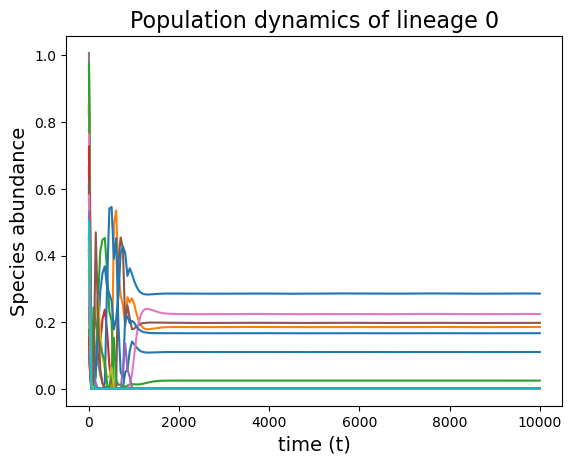

In [101]:
plt.plot(community_dynamics.ODE_sols['lineage 0'].t,community_dynamics.ODE_sols['lineage 0'].y.T)
plt.xlabel('time (t)',fontsize=14)
plt.ylabel('Species abundance',fontsize=14)
plt.title('Population dynamics of lineage 0',fontsize=16)
plt.show()

You can also inspect community properties.

In [106]:
print('Species diversity at the end of simulation = ', community_dynamics.diversity, end='\n')
print('Invasibilities = ', community_dynamics.invasibilities, end='\n')

tidied_final_compositions = {lineage : np.trim_zeros(composition,'b').astype(int) for lineage, composition in community_dynamics.final_composition.items()}
print('Species composition at the end of simulation = ', tidied_final_compositions , end='\n')

Species diversity at the end of simulation =  {'lineage 0': 7, 'lineage 1': 7, 'lineage 2': 7, 'lineage 3': 7, 'lineage 4': 7}
Invasibilities =  {'lineage 0': 0, 'lineage 1': 0, 'lineage 2': 0, 'lineage 3': 0, 'lineage 4': 0}
Species composition at the end of simulation =  {'lineage 0': array([ 1, 10, 15, 30, 32, 36, 40]), 'lineage 1': array([ 1, 10, 15, 30, 32, 36, 40]), 'lineage 2': array([ 1, 10, 15, 30, 32, 36, 40]), 'lineage 3': array([ 1, 10, 15, 30, 32, 36, 40]), 'lineage 4': array([ 1, 10, 15, 30, 32, 36, 40])}


The community class can also calculate the number of unique species compositions that can be achieved by a community at the end of simulations. This tells us whether a community species composition is sensitive to initial species abundances (e.g. a community with one stable state has one unique composition, wherehas a multi-stable community has n unique species compositions).

In [107]:
print('Number of unique species compositions = ', community_dynamics.no_unique_compositions, end = '\n')
print('Compositions = ', community_dynamics.unique_composition_label, end = '\n')

Number of unique species compositions =  1
Compositions =  {'lineage 0': 0, 'lineage 1': 0, 'lineage 2': 0, 'lineage 3': 0, 'lineage 4': 0}


#### Summary of important community class attributes

- **Model parameters**
  - ***no_species***, the initial number of species in the community.
  - ***growth_rates***, species growth rates.
  - ***interaction_matrix***, the interaction matrix.
  - ***dispersal***, the dispersal rate.
- **Simulations**
  - ***t_end***, the time to run simulations.
  - ***initial_abundances***, initial species abundances for all lineages.
  - ***ODE_sols***, Simulated community dynamics for each lineage (A *scipy.integrate.solve_ivp* object using the Runge-Kutta method for numerically solving ODEs.)
- **Community properties**
  - ***diversity***, the species diversity of each lineage at the end of simulations. Technically, species diversity is calculated in the final 20% of the simulation (e.g. if the simulation ran until t = 10000, species diversity is calculated from t = 8000-10000).
  - ***final_composition***, the species present in each lineage at the end of simulation. Also calculated from the final 20% of the simulation.
  - ***invasibilities***, the proportion of species in each lineage that are able to reinvade the community from very low abundances. **This is used to distinguish between high diversity "fluctuating" communities (our communities of interest) and low diversity stable communities or limit-cycles.**
  - ***no_unique_compositions***, the number of unique species compositions a community can achieve from different initial conditions. Aka, the number of unique final species compositions across lineages.
  - ***unique_composition_label***, tells you which lineage has which unique species composition. Can be used to calculate the probability of a community adopting a certain composition.

## Final remarks

If you want to understand more about how the model and classes work, please look at the documentation in community_dynamics_and_properties.py. 
> If you're not sure how a function works from reading the code, add a *breakpoint()* statement into the function you're interested in. When you run the script, the code will stop (in debug mode) in this function. This allows you to inspect local variables and play around with the function.
